In [1]:
from os.path import join
from operator import itemgetter

import numpy as np
from numpy.random import randn
np.random.seed(42)

from scipy.io import loadmat

# Python control toolbox available at https://python-control.readthedocs.io/
from control import ss, use_numpy_matrix
from control.matlab import impulse, lsim
use_numpy_matrix(False)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Previously prepared definition of ORKA system
test_sys = loadmat(join('..', 'DATA', 'testSys_Fig9p5_ABCD.mat'))
A, B, C, D = itemgetter(*'ABCD')(test_sys)

# Setting dt implies a discrete system
system = ss(A, B, C, D, 1.0)

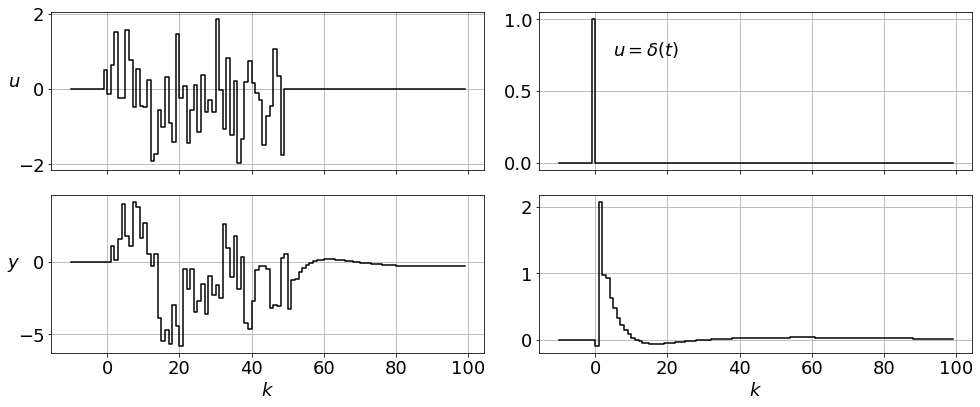

In [3]:
# Figure 9.5

ntimes = 100

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14, 6))

# Response to random input
t = np.arange(ntimes)
u = np.zeros(ntimes)
u[:50] = randn(50)
y, t, _ = lsim(system, u, t)

# Prepend lead in of 10 zeros
t = np.concatenate([np.arange(-10, 0), t])
y = np.concatenate([np.zeros(10), y])
u = np.concatenate([np.zeros(10), u])

axs[0, 0].step(t, u, color='black', linewidth=1.5)
axs[0, 0].grid(True)
axs[0, 0].set_ylabel('$u$', rotation=0)

axs[1, 0].step(t, y, color='black', linewidth=1.5)
axs[1, 0].grid(True)
axs[1, 0].set_ylabel('$y$', rotation=0)
axs[1, 0].set_xlabel('$k$')


# Simple impulse response
y, t = impulse(system, T=np.arange(ntimes))
u = np.zeros_like(y)
u[0] = 1

# Prepend lead in of 10 zeros
t = np.concatenate([np.arange(-10, 0), t])
y = np.concatenate([np.zeros(10), y])
u = np.concatenate([np.zeros(10), u])

axs[0, 1].step(t, u, color='black',linewidth=1.5)
axs[0, 1].grid(True)
axs[0, 1].text(5, 0.75, "$u = \delta(t)$")

axs[1, 1].step(t, y, color='black', linewidth=1.5)
axs[1, 1].grid(True)
axs[1, 1].set_xlabel('$k$')

plt.tight_layout();